# Gathering and Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
beaks_1975 = pd.read_csv('scandens_beaks_1975.csv')
beaks_2012 = pd.read_csv('scandens_beaks_2012.csv')

In [3]:
beaks_1975.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
band               87 non-null int64
species            87 non-null object
Beak length, mm    87 non-null float64
Beak depth, mm     87 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.8+ KB


<p> There is no missing data. <p/>

In [4]:
beaks_1975.head()

,band,species,"Beak length, mm","Beak depth, mm"
0,302,scandens,13.9,8.4
1,304,scandens,14.0,8.8
2,306,scandens,12.9,8.4
3,310,scandens,13.5,8.0
4,317,scandens,12.9,7.9


<p>The variables are:</p>
<ul>
<li><code>band</code> - a unique number that identifies each bird.</li>
<li><code>species</code> - the species of the bird.</li>
<li><code>Beak length, mm</code> - the length of the bird's beak in millimeters.</li>
<li><code>Beak depth, mm</code> - the depth of the bird's beak (the distance, top to bottom, of a closed beak) in millimeters.</li>
</ul>
<p> Those are from year 1975.</p>

In [5]:
beaks_1975.describe()

,band,"Beak length, mm","Beak depth, mm"
count,87.000000,87.000000,87.000000
mean,2985.264368,14.120920,8.960000
std,6309.578017,0.754789,0.566595
min,302.000000,12.800000,7.900000
25%,405.000000,13.500000,8.550000
50%,570.000000,14.000000,9.000000
75%,917.000000,14.740000,9.250000
max,20279.000000,15.940000,10.400000


<p> The data range of beak length and beak depth seems good, no extreme outlier. <p/>

In [6]:
beaks_1975.species.value_counts()

scandens    87
Name: species, dtype: int64

<p> This data only contain data from Scandens species. </p>

In [7]:
beaks_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 4 columns):
band       127 non-null int64
species    127 non-null object
blength    127 non-null float64
bdepth     127 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.1+ KB


<p> There is no missing data. <p/>

In [8]:
beaks_2012.head()

,band,species,blength,bdepth
0,19026,scandens,14.3,9.4
1,19028,scandens,12.5,8.9
2,19029,scandens,13.7,9.5
3,19094,scandens,13.8,11.0
4,19122,scandens,12.0,8.7


<p>The variables are:</p>
<ul>
<li><code>band</code> - a unique number that identifies each bird.</li>
<li><code>species</code> - the species of the bird.</li>
<li><code>blength, mm</code> - the length of the bird's beak in millimeters.</li>
<li><code>bdepth, mm</code> - the depth of the bird's beak (the distance, top to bottom, of a closed beak) in millimeters.</li>
</ul>
<p> Those are from year 2012.</p>

In [9]:
beaks_2012.describe()

,band,blength,bdepth
count,127.000000,127.000000,127.000000
mean,20145.086614,13.421024,9.186220
std,841.243307,0.720393,0.669241
min,19026.000000,11.400000,7.700000
25%,19477.500000,13.000000,8.800000
50%,19766.000000,13.400000,9.200000
75%,21133.000000,13.900000,9.600000
max,21347.000000,15.200000,11.000000


<p> The data range of beak length and beak depth seems good, no extreme outlier. <p/>

In [10]:
beaks_2012.species.value_counts()

scandens    127
Name: species, dtype: int64

<p> This data only contain data from Scandens species. </p>

In [11]:
column = ['band', 'species', 'beak length (mm)', 'beak depth (mm)']

In [12]:
beaks_1975.columns = column
beaks_2012.columns = column
beaks_1975['year'] = 1975
beaks_2012['year'] = 2012
beaks = beaks_1975.append(beaks_2012)

In [13]:
beaks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 126
Data columns (total 5 columns):
band                214 non-null int64
species             214 non-null object
beak length (mm)    214 non-null float64
beak depth (mm)     214 non-null float64
year                214 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 10.0+ KB


In [14]:
beaks.head()

,band,species,beak length (mm),beak depth (mm),year
0,302,scandens,13.9,8.4,1975
1,304,scandens,14.0,8.8,1975
2,306,scandens,12.9,8.4,1975
3,310,scandens,13.5,8.0,1975
4,317,scandens,12.9,7.9,1975


In [15]:
beaks[beaks.duplicated(subset=['band', 'species', 'beak length (mm)', 'beak depth (mm)', 'year'], keep=False)]

,band,species,beak length (mm),beak depth (mm),year


In [16]:
beaks[beaks.duplicated(subset='band', keep=False)]

,band,species,beak length (mm),beak depth (mm),year


<p> There are no duplicate rows nor duplicate bird's band, so the data is unpaired. </p>

# Data Analysis of Beak Depth

## Exploratory Data Analysis

In [17]:
bd_1975 = np.array(beaks[beaks['year']==1975]['beak depth (mm)'])
bl_1975 = np.array(beaks[beaks['year']==1975]['beak length (mm)'])
bd_2012 = np.array(beaks[beaks['year']==2012]['beak depth (mm)'])
bl_2012 = np.array(beaks[beaks['year']==2012]['beak length (mm)'])

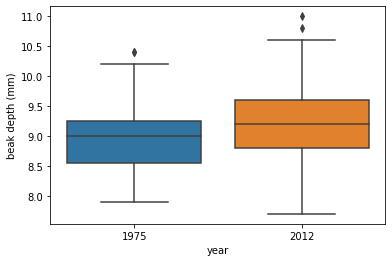

In [18]:
sns.boxplot(x='year', y='beak depth (mm)', data=beaks)

In [19]:
def ecdf(data) :
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return(x, y)

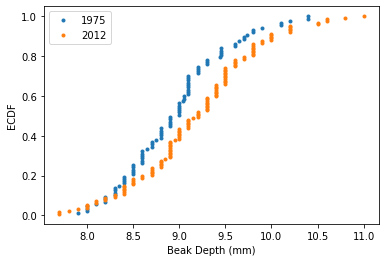

In [20]:
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)
plt.plot(x_1975, y_1975, marker = '.', linestyle='none', label = '1975')
plt.plot(x_2012, y_2012, marker = '.', linestyle='none', label = '2012')
plt.xlabel('Beak Depth (mm)')
plt.ylabel('ECDF')
plt.legend()
plt.show()

In [21]:
print('mean of beak depth (mm) in 1975 :', bd_1975.mean())
print('mean of beak depth (mm) in 2012 :', bd_2012.mean())

mean of beak depth (mm) in 1975 : 8.959999999999999
mean of beak depth (mm) in 2012 : 9.186220472440946


In [22]:
print('difference of mean :', bd_2012.mean()-bd_1975.mean(), 'mm')

difference of mean : 0.22622047244094645 mm


<p> It seems like Scandens birds in the year 2012 have a deeper beak than Scandens birds in the year 1975.</p>
<p> To prove it, a parametric hypothesis test will be carried out, but before that, a homogeneity test and a normality test will be conducted.</p>

## Normality Test 

In [23]:
stat, p = stats.normaltest(bd_1975)
print('Normality Test of Beak Depth 1975 :')
print('statistic =', stat)
print('p value =', p)

Normality Test of Beak Depth 1975 :
statistic = 3.156169329820942
p value = 0.20636998759007116


<p> The P-value is greater than 0.05, <strong>the data from 1975 is normal.</strong></p>
<p> We can visualize and compare it with Normal Distribution CDF.</p>

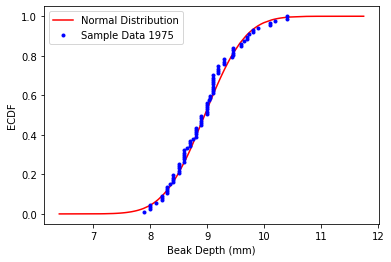

In [24]:
normal_bdepth_1975 = np.random.normal(np.mean(bd_1975), np.std(bd_1975), 1000000)
x_normal, y_normal = ecdf(normal_bdepth_1975)
x_1975, y_1975 = ecdf(bd_1975)
plt.plot(x_normal, y_normal, label = 'Normal Distribution', color='r')
plt.plot(x_1975, y_1975, marker = '.', linestyle='none', label = 'Sample Data 1975', color='b')
plt.xlabel('Beak Depth (mm)')
plt.ylabel('ECDF')
plt.legend(loc='upper left')
plt.show()

In [25]:
stat, p = stats.normaltest(bd_2012)
print('Normality Test of Beak Depth 2012 :')
print('statistic =', stat)
print('p value =', p)

Normality Test of Beak Depth 2012 :
statistic = 0.24568094100147858
p value = 0.8844047399528273


<p> The P-value is greater than 0.05, <strong>the data from 2012 is normal.</strong></p>
<p> We can visualize and compare it with Normal Distribution CDF.</p>

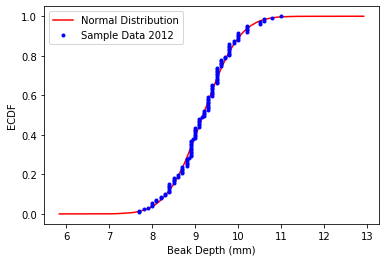

In [26]:
normal_bdepth_2012 = np.random.normal(np.mean(bd_2012), np.std(bd_2012), 1000000)
x_normal, y_normal = ecdf(normal_bdepth_2012)
x_2012, y_2012 = ecdf(bd_2012)
plt.plot(x_normal, y_normal, label = 'Normal Distribution', color='r')
plt.plot(x_2012, y_2012, marker = '.', linestyle='none', label = 'Sample Data 2012', color='b')
plt.xlabel('Beak Depth (mm)')
plt.ylabel('ECDF')
plt.legend(loc='upper left')
plt.show()

## Homogeneity Test

In [27]:
stat, p = stats.levene(bd_1975, bd_2012, center='mean')
print('Homogeneity Test of Beak Depth :')
print('statistic =', stat)
print('p value =', p)

Homogeneity Test of Beak Depth :
statistic = 2.4959603476658674
p value = 0.11562957693990795


<p> Because the sample size of the 2 data is different, the homogeneity test was carried out.</p>
<p> The test result P-value is greater than 0.05, <strong>the variance is equal across groups.</strong></p>

## Independent T-Test

<p> We find that both data from 1975 and 2012 are normal, and that the variance is equal across groups. Therefore an Independent T-Test will be carried out to determines whether there is a statistically significant difference between the means in two unrelated groups.</p>
<p>Perform a hypothesis test on the difference in the two population means using a level of significance α = 0.05 (i.e., 5%).</p>
<p>m1 = mean of population from 2012</p>
<p>m2 = mean of population from 1975</p>
<p>H0 : m1 <= m2</p>
<p>H1 : m1 > m2</p>

In [28]:
stat, p = stats.ttest_ind(bd_2012, bd_1975)
print('Independent T-Test of Beak Depth :')
print('statistic =', stat)
print('p value =', p/2)

Independent T-Test of Beak Depth :
statistic = 2.5817030196120143
p value = 0.00525264125127548


<p>The P-value is lesser than 0.05.</p>
<p>The conclusion of the hypothesis test is : <strong>Reject the Null Hypothesis.</strong> There is sufficient evidence to say that <strong>the mean of Scandens bird's beak depth from 2012 is deeper than the mean of Scandens bird's beak depth from 1975</strong> with the level of significance 5%.</p>

## Confidence Interval

In [29]:
def ci_ttest(x1, x2, alpha=0.05) :
    """
    Calculate confidence interval of difference in mean assuming equal variance (student's t-interval)
    """
    n1, n2 = len(x1), len(x2)                                    # sample sizes
    s1, s2 = np.var(x1, ddof=1), np.var(x2, ddof=1)              # sample variances
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) # pooled standard deviation
    df = n1 + n2 - 2                                             # degrees of freedom
    t = stats.t.ppf(1 - alpha/2, df)                             # t-critical value for 95% CI

    lower = (np.mean(x1) - np.mean(x2)) - t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s
    upper = (np.mean(x1) - np.mean(x2)) + t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s
    return(lower, upper)

In [30]:
lower, upper = ci_ttest(bd_2012, bd_1975)
print('The 95% confidence interval of difference in means (in millimeters) :')
print('(', lower, ',', upper, ')')

The 95% confidence interval of difference in means (in millimeters) :
( 0.053493539685989105 , 0.39894740519590377 )


So we believe that the range <strong>0.0535 to 0.3989</strong> (in millimeters) contains <strong>the difference between the average Scandens bird's beak depth of the year 2012 and 1975</strong> at 𝛼 = 5%.

We are 95% confident that the Scandens bird's <strong>beak depth mean in 2012</strong> got about <strong>0.0535 mm up to 0.3989 mm deeper than in 1975.</strong>

# Data Analysis of Beak Length

## Exploratory Data Analysis

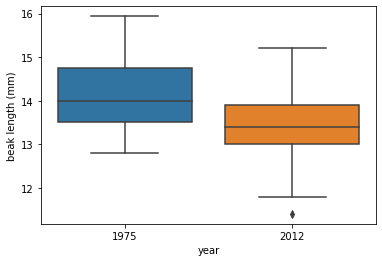

In [31]:
sns.boxplot(x='year', y='beak length (mm)', data=beaks)

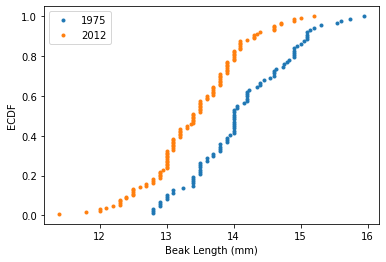

In [32]:
x_1975, y_1975 = ecdf(bl_1975)
x_2012, y_2012 = ecdf(bl_2012)
plt.plot(x_1975, y_1975, marker = '.', linestyle='none', label = '1975')
plt.plot(x_2012, y_2012, marker = '.', linestyle='none', label = '2012')
plt.xlabel('Beak Length (mm)')
plt.ylabel('ECDF')
plt.legend()
plt.show()

In [33]:
print('mean of beak length (mm) in 1975 :', bl_1975.mean())
print('mean of beak length (mm) in 2012 :', bl_2012.mean())

mean of beak length (mm) in 1975 : 14.120919540229885
mean of beak length (mm) in 2012 : 13.421023622047242


In [34]:
print('difference of mean :', bl_2012.mean()-bl_1975.mean(), 'mm')

difference of mean : -0.6998959181826425 mm


<p> It seems like Scandens birds in the year 2012 have a shorter beak than Scandens birds in the year 1975.</p>
<p> To prove it, a parametric hypothesis test will be carried out, but before that, a homogeneity test and a normality test will be conducted.</p>

## Normality Test

In [35]:
stat, p = stats.normaltest(bl_1975)
print('Normality Test of Beak Length 1975 :')
print('statistic =', stat)
print('p value =', p)

Normality Test of Beak Length 1975 :
statistic = 2.8230555400068
p value = 0.2437705731489806


<p> The P-value is greater than 0.05, <strong>the data from 1975 is normal.</strong></p>
<p> We can visualize and compare it with Normal Distribution CDF.</p>

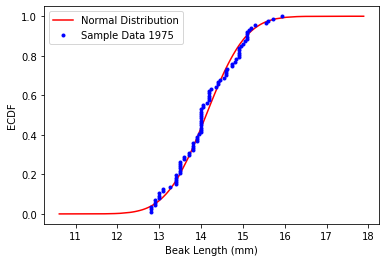

In [36]:
normal_blength_1975 = np.random.normal(np.mean(bl_1975), np.std(bl_1975), 1000000)
x_normal, y_normal = ecdf(normal_blength_1975)
x_1975, y_1975 = ecdf(bl_1975)
plt.plot(x_normal, y_normal, label = 'Normal Distribution', color='r')
plt.plot(x_1975, y_1975, marker = '.', linestyle='none', label = 'Sample Data 1975', color='b')
plt.xlabel('Beak Length (mm)')
plt.ylabel('ECDF')
plt.legend(loc='upper left')
plt.show()

In [37]:
stat, p = stats.normaltest(bl_2012)
print('Normality Test of Beak Length 2012 :')
print('statistic =', stat)
print('p value =', p)

Normality Test of Beak Length 2012 :
statistic = 0.061301618059789585
p value = 0.969814164304941


<p> The P-value is greater than 0.05, <strong>the data from 2012 is normal.</strong></p>
<p> We can visualize and compare it with Normal Distribution CDF.</p>

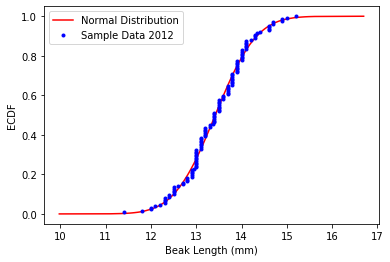

In [38]:
normal_blength_2012 = np.random.normal(np.mean(bl_2012), np.std(bl_2012), 1000000)
x_normal, y_normal = ecdf(normal_blength_2012)
x_2012, y_2012 = ecdf(bl_2012)
plt.plot(x_normal, y_normal, label = 'Normal Distribution', color='r')
plt.plot(x_2012, y_2012, marker = '.', linestyle='none', label = 'Sample Data 2012', color='b')
plt.xlabel('Beak Length (mm)')
plt.ylabel('ECDF')
plt.legend(loc='upper left')
plt.show()

## Homogeneity Test

In [39]:
stat, p = stats.levene(bl_1975, bl_2012, center='mean')
print('Homogeneity Test of Beak Length :')
print('statistic =', stat)
print('p value =', p)

Homogeneity Test of Beak Length :
statistic = 0.3471919775382065
p value = 0.5563343683004304


<p> Because the sample size of the 2 data is different, the homogeneity test was carried out.</p>
<p> The test result P-value is greater than 0.05, <strong>the variance is equal across groups.</strong></p>

## Independent T-Test

<p> We find that both data from 1975 and 2012 are normal, and that the variance is equal across groups. Therefore an Independent T-Test will be carried out to determines whether there is a statistically significant difference between the means in two unrelated groups.</p>
<p>Perform a hypothesis test on the difference in the two population means using a level of significance α = 0.05 (i.e., 5%).</p>
<p>m1 = mean of population from 2012</p>
<p>m2 = mean of population from 1975</p>
<p>H0 : m1 >= m2</p>
<p>H1 : m1 < m2</p>

In [40]:
stat, p = stats.ttest_ind(bl_2012, bl_1975)
print('Independent T-Test of Beak Length :')
print('statistic =', stat)
print('p value =', p/2)

Independent T-Test of Beak Length :
statistic = -6.846559942453622
p value = 4.013678636449343e-11


<p>The P-value is lesser than 0.05.</p>
<p>The conclusion of the hypothesis test is : <strong>Reject the Null Hypothesis.</strong> There is sufficient evidence to say that <strong>the mean of Scandens bird's beak length from 2012 is shorter than the mean of Scandens bird's beak length from 1975</strong> with the level of significance 5%.</p>

## Confidence Interval

In [41]:
lower, upper = ci_ttest(bl_2012, bl_1975)
print('The 95% confidence interval of difference in means (in millimeters) :')
print('(', lower, ',', upper, ')')

The 95% confidence interval of difference in means (in millimeters) :
( -0.9014053992255738 , -0.4983864371397112 )


So we believe that the range <strong>0.4984 to 0.9014</strong> (in millimeters) contains <strong>the difference between the average Scandens bird's beak length of the year 2012 and 1975</strong> at 𝛼 = 5%.

We are 95% confident that the Scandens bird's <strong>beak length mean in 2012</strong> got about <strong>0.4984 mm up to 0.9014 mm shorter (minus sign) than in 1975.</strong>

# Data Analysis of Beak Depth to Length Ratio

## Exploratory Data Analysis

In [42]:
m_1975, b_1975 = np.polyfit(bl_1975, bd_1975, 1)
m_2012, b_2012 = np.polyfit(bl_2012, bd_2012, 1)

In [43]:
print('1975: slope =', m_1975, 'intercept =', b_1975)
print('2012: slope =', m_2012, 'intercept =', b_2012)

1975: slope = 0.4652051691605937 intercept = 2.3908752365842263
2012: slope = 0.462630358835313 intercept = 2.9772474982360198


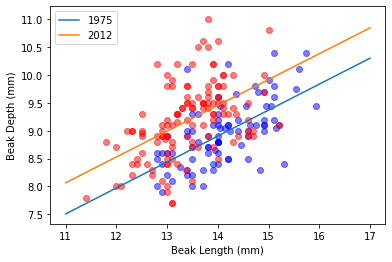

In [44]:
xpoint = np.array([11, 17])
plt.plot(xpoint, xpoint*m_1975+b_1975)
plt.plot(xpoint, xpoint*m_2012+b_2012)
plt.scatter(bl_1975, bd_1975, color = 'b', label = '1975', alpha=0.5)
plt.scatter(bl_2012, bd_2012, color = 'r', label = '2012', alpha=0.5)
plt.xlabel('Beak Length (mm)')
plt.ylabel('Beak Depth (mm)')
plt.legend(('1975', '2012'))
plt.show()

<p> In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction) and a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.</p>
<p> Perform a linear regression for both the 1975 and 2012 data, it looks like they have the same slope, but different intercepts.</p>

In [45]:
beaks['bdepth/blength'] = np.array(beaks['beak depth (mm)']) / np.array(beaks['beak length (mm)'])

In [46]:
beaks.head()

,band,species,beak length (mm),beak depth (mm),year,bdepth/blength
0,302,scandens,13.9,8.4,1975,0.604317
1,304,scandens,14.0,8.8,1975,0.628571
2,306,scandens,12.9,8.4,1975,0.651163
3,310,scandens,13.5,8.0,1975,0.592593
4,317,scandens,12.9,7.9,1975,0.612403


In [47]:
bratio_1975 = beaks[beaks['year']==1975]['bdepth/blength']
bratio_2012 = beaks[beaks['year']==2012]['bdepth/blength']

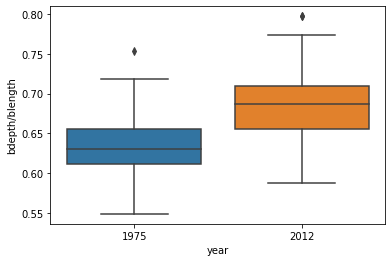

In [48]:
sns.boxplot(x='year', y='bdepth/blength', data=beaks)

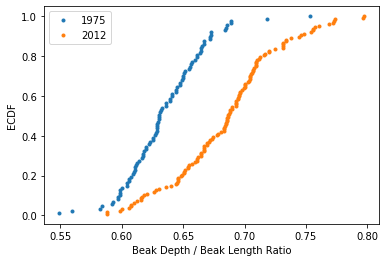

In [49]:
x_1975, y_1975 = ecdf(bratio_1975)
x_2012, y_2012 = ecdf(bratio_2012)
plt.plot(x_1975, y_1975, marker = '.', linestyle='none', label = '1975')
plt.plot(x_2012, y_2012, marker = '.', linestyle='none', label = '2012')
plt.xlabel('Beak Depth / Beak Length Ratio')
plt.ylabel('ECDF')
plt.legend()
plt.show()

In [50]:
print('mean of beak depth/length ratio in 1975 :', bratio_1975.mean())
print('mean of beak depth/length ratio in 2012 :', bratio_2012.mean())

mean of beak depth/length ratio in 1975 : 0.6349990847376105
mean of beak depth/length ratio in 2012 : 0.6850757317280309


In [51]:
print('difference of mean :', bratio_2012.mean()-bratio_1975.mean(), 'mm')

difference of mean : 0.05007664699042047 mm


<p> It seems like Scandens birds in the year 2012 have different beak shapes than Scandens birds in the year 1975.</p>
<p> To prove it, a parametric hypothesis test will be carried out, but before that, a homogeneity test and a normality test will be conducted.</p>

## Normality Test

In [52]:
stat, p = stats.normaltest(bratio_1975)
print('Normality Test of Beak Depth/Length Ratio 1975 :')
print('statistic =', stat)
print('p value =', p)

Normality Test of Beak Depth/Length Ratio 1975 :
statistic = 8.029083744017512
p value = 0.018051222427002817


<p> The P-value is lesser than 0.05, the data from 1975 significantly deviate from a normal distribution.</p>
<p> But, depending on the method and sample size, we can still use Parametric Hypothesis Test even when the distribution is far from normal because of the Central Limit Theorem. The sample size of data 1975 is 87, which is more than the minimum sample size, 30.</p>
<p> We can visualize and compare it with Normal Distribution CDF.</p>

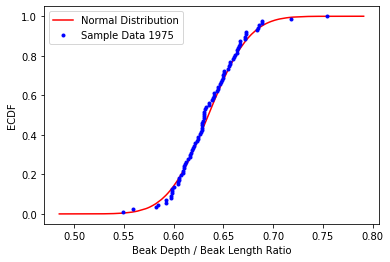

In [53]:
normal_bratio_1975 = np.random.normal(np.mean(bratio_1975), np.std(bratio_1975), 1000000)
x_normal, y_normal = ecdf(normal_bratio_1975)
x_1975, y_1975 = ecdf(bratio_1975)
plt.plot(x_normal, y_normal, label = 'Normal Distribution', color='r')
plt.plot(x_1975, y_1975, marker = '.', linestyle='none', label = 'Sample Data 1975', color='b')
plt.xlabel('Beak Depth / Beak Length Ratio')
plt.ylabel('ECDF')
plt.legend(loc='upper left')
plt.show()

In [54]:
stat, p = stats.normaltest(bratio_2012)
print('Normality Test of Beak Depth/Length Ratio 2012 :')
print('statistic =', stat)
print('p value =', p)

Normality Test of Beak Depth/Length Ratio 2012 :
statistic = 0.09390161994602773
p value = 0.9541343303295077


<p> The P-value is greater than 0.05, <strong>the data from 2012 is normal.</strong></p>
<p> We can visualize and compare it with Normal Distribution CDF.</p>

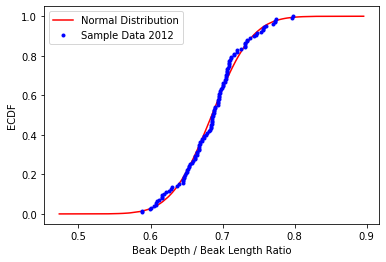

In [55]:
normal_bratio_2012 = np.random.normal(np.mean(bratio_2012), np.std(bratio_2012), 1000000)
x_normal, y_normal = ecdf(normal_bratio_2012)
x_2012, y_2012 = ecdf(bratio_2012)
plt.plot(x_normal, y_normal, label = 'Normal Distribution', color='r')
plt.plot(x_2012, y_2012, marker = '.', linestyle='none', label = 'Sample Data 2012', color='b')
plt.xlabel('Beak Depth / Beak Length Ratio')
plt.ylabel('ECDF')
plt.legend(loc='upper left')
plt.show()

## Homogeneity Test

In [56]:
stat, p = stats.levene(bratio_1975, bratio_2012)
print('Homogeneity Test of Beak Depth/Length Ratio :')
print('statistic =', stat)
print('p value =', p)

Homogeneity Test of Beak Depth/Length Ratio :
statistic = 6.943461123752775
p value = 0.009033830317360174


<p> Because the sample size of the 2 data is different, the homogeneity test was carried out.</p>
<p> The test result P-value is lesser than 0.05, the variance is unequal across groups.</p>

## Welch's T-Test

We find that both data from 1975 and 2012 are normal but have unequal variances. Therefore a Welch's T-Test, or Unequal Variances T-Test, will be carried out to determines whether there is a statistically significant difference between the means in two unrelated groups.

Perform a hypothesis test on the difference in the two population means using a level of significance α = 0.05 (i.e., 5%).

m1 = mean of population from 2012

m2 = mean of population from 1975

H0 : m1 <= m2

H1 : m1 > m2

In [57]:
stat, p = stats.ttest_ind(bratio_2012, bratio_1975, equal_var=False)
print("Welch's T-Test of Beak Depth/Length Ratio :")
print('statistic =', stat)
print('p value =', p/2)

Welch's T-Test of Beak Depth/Length Ratio :
statistic = 9.490397259559566
p value = 2.5700902021201317e-18


The P-value is lesser than 0.05.

The conclusion of the hypothesis test is : <strong>Reject the Null Hypothesis.</strong> There is sufficient evidence to say that <strong>the mean of Scandens bird's beak depth to length ratio from 2012 is greater than the mean of Scandens bird's beak depth to length ratio from 1975</strong> with the level of significance 5%.

## Confidence Interval

In [58]:
def ci_welch(x1, x2, alpha=0.05) :
    """
    Calculate confidence interval of difference in mean assuming unequal variance (Welch's t-interval)
    """
    n1, n2 = len(x1), len(x2)                                          # sample sizes
    s1, s2 = np.var(x1, ddof=1), np.var(x2, ddof=1)                    # sample variances
    df = (s1/n1 + s2/n2)**2 / ((s1/n1)**2/(n1-1) + (s2/n2)**2/(n2-1))  # degrees of freedom
    t = stats.t.ppf(1 - alpha/2, df)                                   # t-critical value for 95% CI

    lower = (np.mean(x1) - np.mean(x2)) - t * np.sqrt(s1 / len(x1) + s2 / len(x2))
    upper = (np.mean(x1) - np.mean(x2)) + t * np.sqrt(s1 / len(x1) + s2 / len(x2))
    return(lower, upper)

In [59]:
lower, upper = ci_welch(bratio_2012, bratio_1975)
print('The 95% confidence interval of difference in means :')
print('(', lower, ',', upper, ')')

The 95% confidence interval of difference in means :
( 0.03967508448019007 , 0.06047820950065087 )


So we believe that the range <strong>0.0397 to 0.0605</strong> contains <strong>the difference between the average Scandens bird's beak depth to length ratio of the year 2012 and 1975</strong> at 𝛼 = 5%.

We are 95% confident that the Scandens bird's <strong>beak depth to length ratio mean in 2012</strong> got about <strong>0.0397 up to 0.0605 greater than in 1975.</strong>

It means that for every millimeter gained in beak length, the birds in 2012 gained beak depth about 0.0397 mm up to 0.0605 mm deeper than the birds in 1975.